In [1]:
import scanpy as sc
import os
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from GARDEN import GARDEN
import scanpy as sc
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/root/miniconda3/envs/STAR/lib/R"
print(device)

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:3


In [2]:
adata = sc.read('MOD_slice1.h5ad')
adata

AnnData object with n_obs × n_vars = 7898 × 15176
    obs: 'xcoord', 'ycoord', 'section'
    var: 'n_cells'
    obsm: 'coord', 'spatial'

In [ ]:
model = GARDEN.GARDEN(adata,k_dynamic=6, k_cl=6, device=device, model_select='KNN')
adata = model.train()

The graph contains 39490 edges, 7898 cells.
5.0000 neighbors per cell on average.
Graph_2 Construction
The graph contains 47388 edges, 7898 cells.
6.0000 neighbors per cell on average.
Begin to train ST data...


  0%|          | 1/800 [00:00<06:27,  2.06it/s]

Overall loss : tensor(14.4801, device='cuda:3', grad_fn=<AddBackward0>)


 13%|█▎        | 103/800 [00:12<01:20,  8.69it/s]

Overall loss : tensor(11.5072, device='cuda:3', grad_fn=<AddBackward0>)


 25%|██▌       | 203/800 [00:24<01:08,  8.70it/s]

Overall loss : tensor(9.3380, device='cuda:3', grad_fn=<AddBackward0>)


 38%|███▊      | 303/800 [00:36<00:57,  8.70it/s]

Overall loss : tensor(8.7142, device='cuda:3', grad_fn=<AddBackward0>)


 50%|█████     | 403/800 [00:47<00:46,  8.63it/s]

Overall loss : tensor(8.0350, device='cuda:3', grad_fn=<AddBackward0>)


 63%|██████▎   | 501/800 [00:59<00:40,  7.43it/s]

Overall loss : tensor(7.6647, device='cuda:3', grad_fn=<AddBackward0>)


 75%|███████▌  | 601/800 [01:11<00:26,  7.42it/s]

Overall loss : tensor(8.1667, device='cuda:3', grad_fn=<AddBackward0>)


 88%|████████▊ | 701/800 [01:23<00:13,  7.45it/s]

Overall loss : tensor(7.2377, device='cuda:3', grad_fn=<AddBackward0>)


100%|██████████| 800/800 [01:35<00:00,  8.40it/s]


Optimization finished for ST data!


In [4]:
# set radius to specify the number of neighbors considered during refinement
radius = 30
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"
tool = 'leiden' # mclust, leiden, and louvain
n_clusters = 6
# clustering
from GARDEN.utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=0.5, increment=0.01, refinement=True)

Searching resolution...
resolution=0.48999999999999977, cluster number=6


<AxesSubplot:title={'center':'stGACN'}, xlabel='spatial1', ylabel='spatial2'>

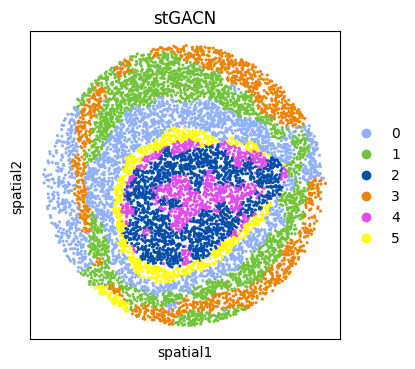

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
colors = ['#8FB0FF', '#71c33a','#024CAA','#EC8305', '#e14aec', '#FFFF00']
sc.pl.embedding(adata, basis="spatial", color="domain",s=20, show=False, title='stGACN',palette=colors)